In [3]:
! pip install -r requirements.txt

  Using cached wordcloud-1.9.2-cp38-cp38-macosx_11_0_arm64.whl


In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from langdetect import detect


In [57]:

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '15topics.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


In [58]:
print(len(df))
df[df['hashtag']=='Cuisine']

3000


topic  hashtag                                            content  \
2560  Food  Cuisine  Elle Cuisine: 5 idées pour sublimer un gratin ...   
2561  Food  Cuisine  Elle Cuisine: Que manger après une mauvaise nu...   
2562  Food  Cuisine  Elle Cuisine: Expresso ou café filtre : quel c...   
2563  Food  Cuisine  Elle Cuisine: Raclette : 4 alternatives végéta...   
2564  Food  Cuisine  La recette du jour : Gâteau pommes-poires - Ma...   
2565  Food  Cuisine  This just out https:// doi.org/10.1007/s44187-...   
2566  Food  Cuisine  Elle Cuisine: 43 recettes d’automne pour budge...   
2567  Food  Cuisine  Elle Cuisine: 24 recettes pour petite cuisine ...   
2568  Food  Cuisine  Elle Cuisine: Cette manière de frire les œufs ...   
2569  Food  Cuisine  La recette du jour : Velouté de chou-fleur à l...   
2570  Food  Cuisine  Elle Cuisine: Menu de la semaine : des idées r...   
2571  Food  Cuisine  Inventer la recette de la 'Tapenade Croustilla...   
2572  Food  Cuisine  Elle Cuisine: Frichtis ou restos gastro : l'I....   
2573  Food  Cuisine  Il y a forcément un # Enfer pour les ingénieur...   
2574  Food  Cuisine  Elle Cuisine: Avis de chef : Ajouter un œuf su...   
2575  Food  Cuisine  Passion cocottes jaunes. Des poivrons, de la m...   
2576  Food  Cuisine  Bon, ça fait deux fois que j'essaie de faire d...   
2577  Food  Cuisine  Des gens en région genevoise intéressés par la...   
2578  Food  Cuisine  Sorbes au sirop Nettoyez et stérilisez un boca...   
2579  Food  Cuisine  La recette du jour : Gratin de pamplemousse po...   
2580  Food  Cuisine  Bonsoir tout le monde, la Gazinière de novembr...   
2581  Food  Cuisine  Samedi pâtisserie Tarte aux noisettes # cuisin...   
2582  Food  Cuisine  Des lasagnes végétaliennes maison pour se réch...   
2583  Food  Cuisine  Elle Cuisine: L’automne à table : le chef Arna...   
2584  Food  Cuisine  La recette du jour : Courge Butternut rôtie au...   
2585  Food  Cuisine  Bon, je sais. C'est trop tard pour commencer à...   
2586  Food  Cuisine  Elle Cuisine: Skyr : La tendance du yaourt hea...   
2587  Food  Cuisine  Elle Cuisine: Une cuisson tout en perfection a...   
2588  Food  Cuisine  Je me suis fait arracher une (énorme) dent hie...   
2589  Food  Cuisine  Elle Cuisine: Vous ne soupçonniez pas que la c...   
2590  Food  Cuisine  @ julie @ avrona Vous êtes candidats ? # Breiz...   
2591  Food  Cuisine  Elle Cuisine: Louane : la recette de cuisine q...   
2592  Food  Cuisine  Elle Cuisine: 26 recettes rapides quand on est...   
2593  Food  Cuisine  Non mais c'est vrai, quoi, faut pas déconner.....   
2594  Food  Cuisine  Elle Cuisine: 28 recettes de petit-déjeuner à ...   
2595  Food  Cuisine  La recette du jour : Carrot Cake pour 8  perso...   
2596  Food  Cuisine  Capturing the richness of Restaurant XYZ's Veg...   
2597  Food  Cuisine  Khobez flatbread was successful! I've always l...   
2598  Food  Cuisine  # idéeCadeau pour des enfants qui aiment cuisi...   
2599  Food  Cuisine  Elle Cuisine: Je suis journaliste cuisine et v...   

     hashtag_related 1 hashtag_related 2        hashtag_related 3  \
2560         #francais          #cuisine                    #Elle   
2561         #francais          #cuisine                    #Elle   
2562         #francais          #cuisine                    #Elle   
2563         #francais          #cuisine                    #Elle   
2564          #recette          #cuisine           #recettefacile   
2565             #food          #cuisine                 #ecuador   
2566         #francais          #cuisine                    #Elle   
2567         #francais          #cuisine                    #Elle   
2568         #francais          #cuisine                    #Elle   
2569          #recette          #cuisine           #recettefacile   
2570         #francais          #cuisine                    #Elle   
2571          #cuisine             #fail                      NaN   
2572         #francais          #cuisine                    #Elle   
2573

In [45]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        # In case the language detection fails
        return False
df = df[df['content'].apply(is_english)]
df[df['topic']=='Food']

topic      hashtag                                            content  \
2400  Food       Recipe  Think you're tough? If you’re not pounding fro...   
2401  Food       Recipe  Mom's recipe box Mixing homespun cookies With ...   
2412  Food       Recipe  🌟 Quick & Nutritious Orange-Carrot and Turmeri...   
2413  Food       Recipe  -- BREAKING -- This soup is ~*~*~MAGICAL~*~*~ ...   
2414  Food       Recipe  This is a complex # recipe . But it's also one...   
...    ...          ...                                                ...   
2557  Food  Restaurants  DoorDash warns diners: If you don’t tip, expec...   
2559  Food  Restaurants  I put roast beef on top of rice and made it in...   
2565  Food      Cuisine  This just out https:// doi.org/10.1007/s44187-...   
2596  Food      Cuisine  Capturing the richness of Restaurant XYZ's Veg...   
2597  Food      Cuisine  Khobez flatbread was successful! I've always l...   

     hashtag_related 1 hashtag_related 2        hashtag_related 3  \
2400          #History        #Histodons              #Bookstodon   
2401            #Haiku     #OneHaikuADay       #WritersCollective   
2412           #recipe           #health            #womenshealth   
2413           #recipe           #dinner                    #soup   
2414           #recipe               NaN                      NaN   
...                ...               ...                      ...   
2557         #DoorDash      #restaurants                 #grubhub   
2559             #beef      #restaurants               #delicious   
2565             #food          #cuisine                 #ecuador   
2596  #StableDiffusion               #ai  #ArtificialIntelligence   
2597          #cuisine            #bread                      NaN   

      hashtag_related 4    hashtag_related 5                       author  \
2400             #Ebook             #DRMFree                historyshapes   
2401  #writingcommunity                #WWII                UberZeitgeist   
2412     #menopausetalk  #nutritionaltherapy                  alisonbladh   
2413                NaN                  NaN                       imtheq   
2414                NaN                  NaN              NextGenCookbook   
...                 ...                  ...                          ...   
2557          #DoorDash                  NaN                  Moonshadows   
2559              #おいしい                  NaN                      lyrasky   
2565        #gastronomy                  NaN                       roduar   
2596              #food               #event  ai_automations_experimental   
2597                NaN                  NaN                    Sanssouci   

                             create_at  
2400  2023-11-14 16:14:30.929000+00:00  
2401         2023-11-14 15:44:46+00:00  
2412  2023-11-14 05:32:30.442000+00:00  
2413         2023-11-14 02:34:08+00:00  
2414         2023-11-13 23:17:53+00:00  
...                                ...  
2557         2023-11-03 22:24:49+00:00  
2559  2023-11-03 11:35:29.755000+00:00  
2565         2023-11-14 01:06:07+00:00  
2596         2023-11-09 19:30:15+00:00  
2597         2023-11-09 18:56:39+00:00  

[122 rows x 10 columns]

In [50]:
df[df['hashtag']=='Cuisine']

topic  hashtag                                            content  \
2565  Food  Cuisine  This just out https:// doi.org/10.1007/s44187-...   
2596  Food  Cuisine  Capturing the richness of Restaurant XYZ's Veg...   
2597  Food  Cuisine  Khobez flatbread was successful! I've always l...   

     hashtag_related 1 hashtag_related 2        hashtag_related 3  \
2565             #food          #cuisine                 #ecuador   
2596  #StableDiffusion               #ai  #ArtificialIntelligence   
2597          #cuisine            #bread                      NaN   

     hashtag_related 4 hashtag_related 5                       author  \
2565       #gastronomy               NaN                       roduar   
2596             #food            #event  ai_automations_experimental   
2597               NaN               NaN                    Sanssouci   

                      create_at  
2565  2023-11-14 01:06:07+00:00  
2596  2023-11-09 19:30:15+00:00  
2597  2023-11-09 18:56:39+00:00

In [46]:
len(df)

2611

<Figure size 1200x800 with 0 Axes>

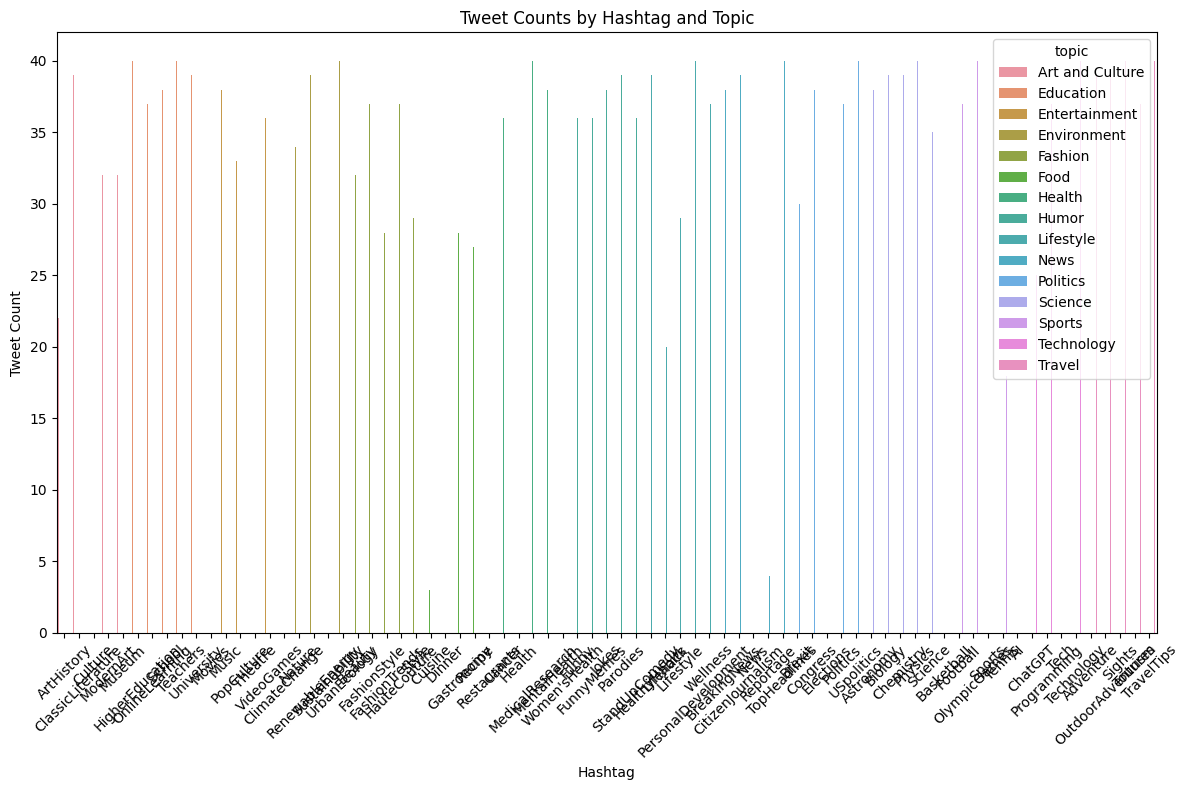

In [47]:
import seaborn as sns  # seaborn 
plt.figure(figsize=(12, 8))
# 'hashtag' explode 
df['hashtag'] = df['hashtag'].str.split()
df = df.explode('hashtag')

# count()
hashtag_counts = df.groupby(['topic', 'hashtag']).size().reset_index(name='count')

# seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='hashtag', y='count', hue='topic', data=hashtag_counts)
plt.xlabel('Hashtag')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Hashtag and Topic')
plt.xticks(rotation=45)
plt.tight_layout()

# show
plt.show()

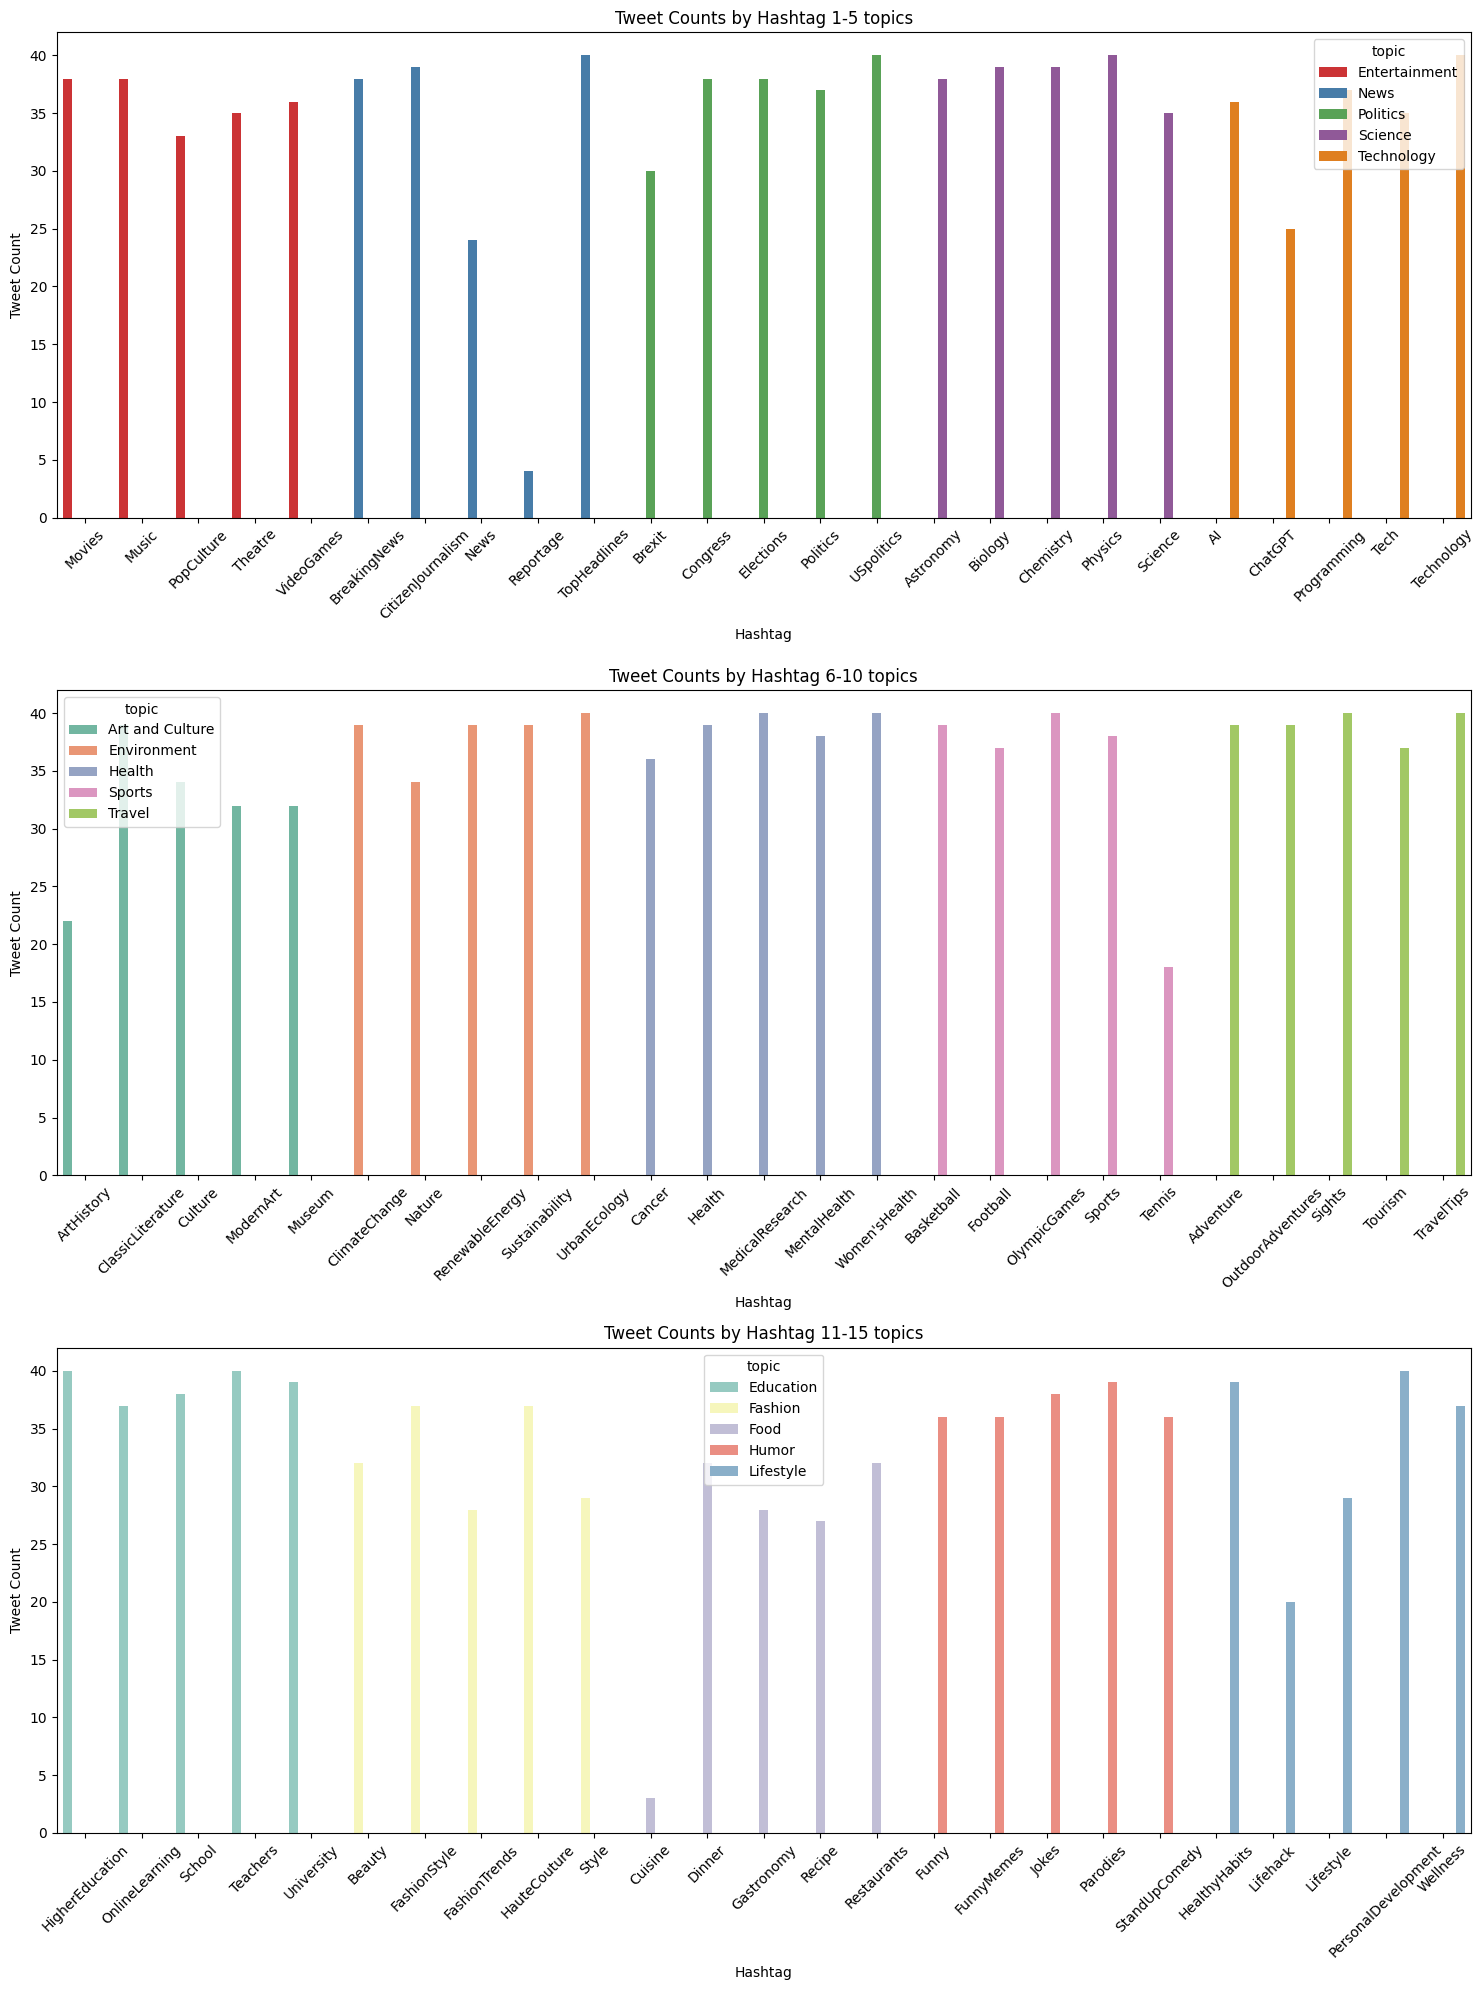

In [48]:
# 5
plt.figure(figsize=(15, 20))
plt.subplot(3, 1, 1)
sns.barplot(x='hashtag', y='count', hue='topic', data=hashtag_counts[hashtag_counts['topic'].isin( df['topic'].unique()[:5])], palette='Set1')
plt.xlabel('Hashtag')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Hashtag 1-5 topics')
#plt.xticks([])
plt.xticks(rotation=45)

# 5
plt.subplot(3, 1, 2)
sns.barplot(x='hashtag', y='count', hue='topic', data=hashtag_counts[hashtag_counts['topic'].isin(df['topic'].unique()[5:10])], palette='Set2')
plt.xlabel('Hashtag')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Hashtag 6-10 topics')
plt.xticks(rotation=45)
#plt.xticks([])

# 5
plt.subplot(3, 1, 3)
sns.barplot(x='hashtag', y='count', hue='topic', data=hashtag_counts[hashtag_counts['topic'].isin( df['topic'].unique()[10:])], palette='Set3')
plt.xlabel('Hashtag')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts by Hashtag 11-15 topics')
plt.xticks(rotation=45)
#plt.xticks([])
# 调整子图之间的距离
plt.tight_layout()

# 显示图表
plt.show()

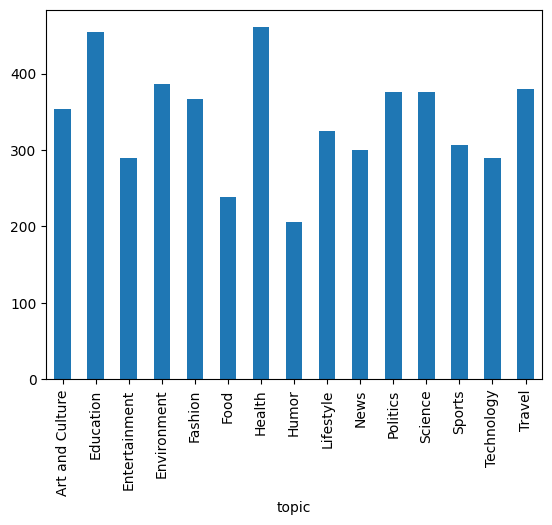

In [51]:
# show by histogram the distribution of the length of the posts of each topic
df.groupby('topic')['content'].apply(lambda x: x.str.len().mean()).plot(kind='bar')
plt.show()


In [56]:
df.to_csv("15topics_en.csv", index=False)

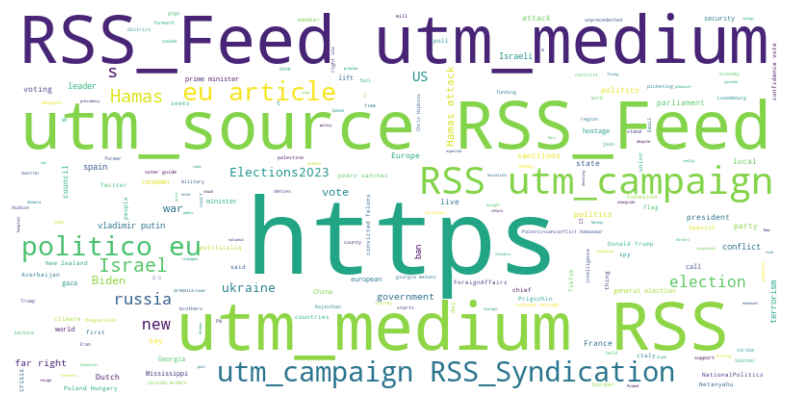

In [48]:


politics_content = df[df['topic'] == 'Politics']['content']

politics_text = ' '.join(politics_content)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(politics_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [52]:
import string
def remove_URL(url):
    url=url.lower()
    url_new = re.sub('[' + re.escape(string.punctuation) + ']', ' ', url)
    url_without_unwanted_parts = re.sub(r'https|www|article|utm|source|RSS|medium|Feed|campaign|', '', url_new)
    return url_without_unwanted_parts

In [53]:
df['content'] = df['content'].apply(remove_URL)

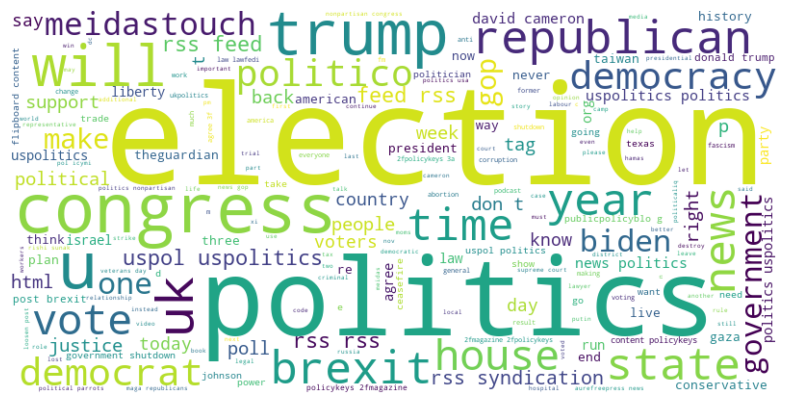

In [54]:
from wordcloud import WordCloud, STOPWORDS
custom_stopwords = set(['eu', 's','new'])  # 在此处添加你的自定义停用词

# 将自定义停用词添加到 STOPWORDS 集合中
STOPWORDS.update(custom_stopwords)
politics_content = df[df['topic'] == 'Politics']['content']

politics_text = ' '.join(politics_content)
politics_text=politics_text.lower()
wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=STOPWORDS).generate(politics_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [59]:
df['topic'].unique()

array(['Politics', 'Technology', 'Science', 'Entertainment', 'News',
       'Art and Culture', 'Sports', 'Health', 'Environment', 'Travel',
       'Fashion', 'Education', 'Food', 'Humor', 'Lifestyle'], dtype=object)

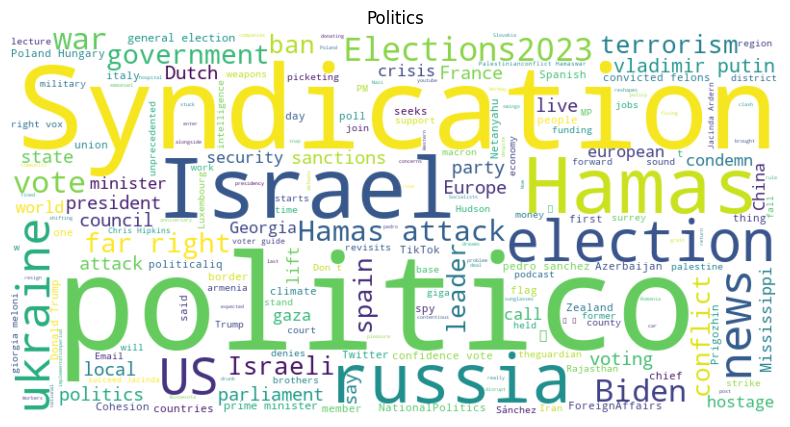

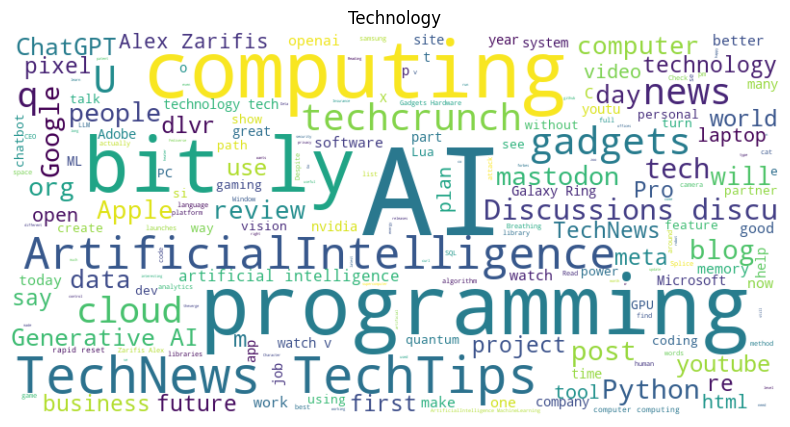

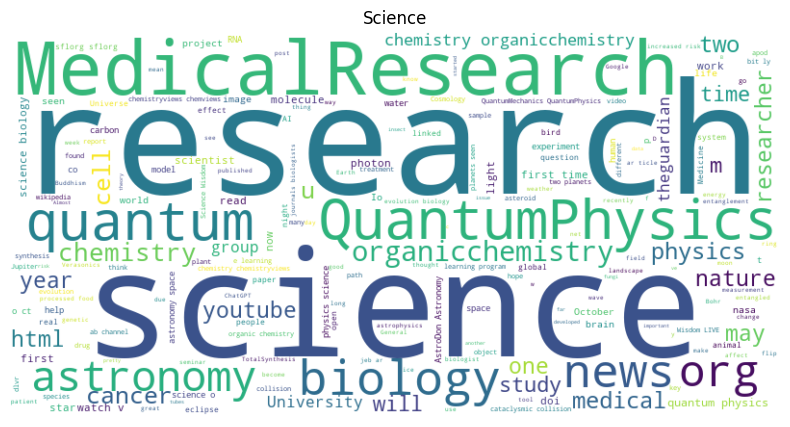

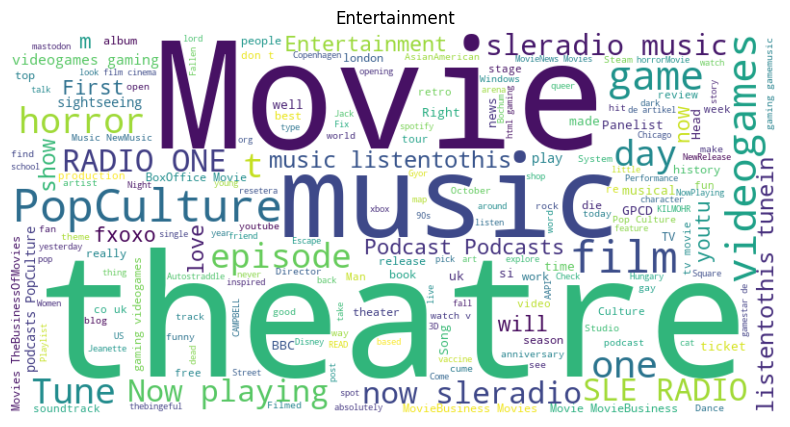

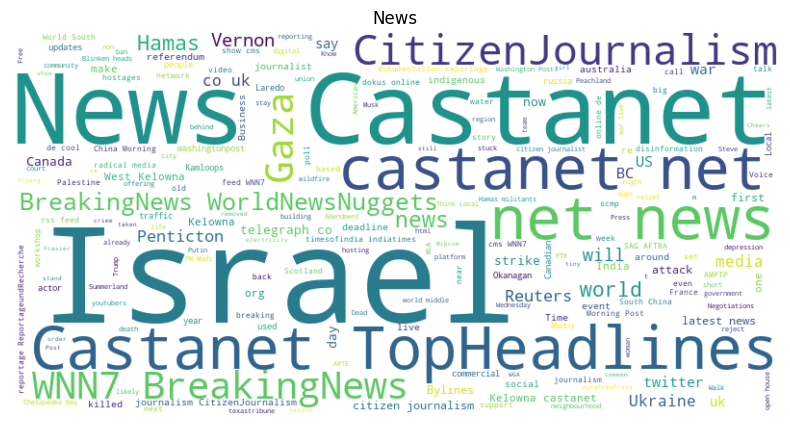

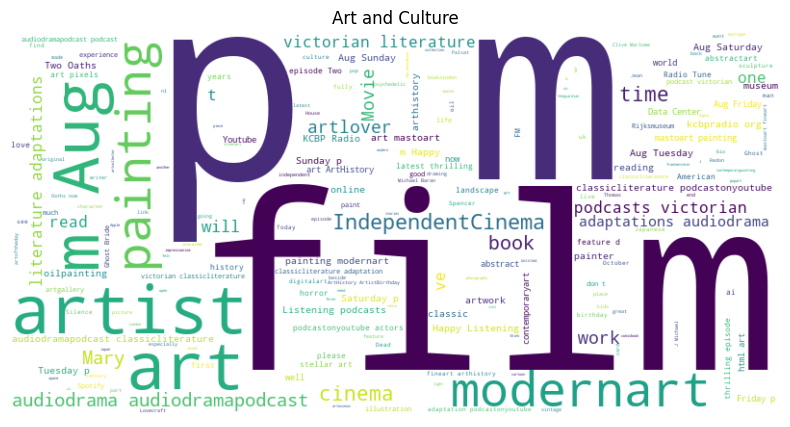

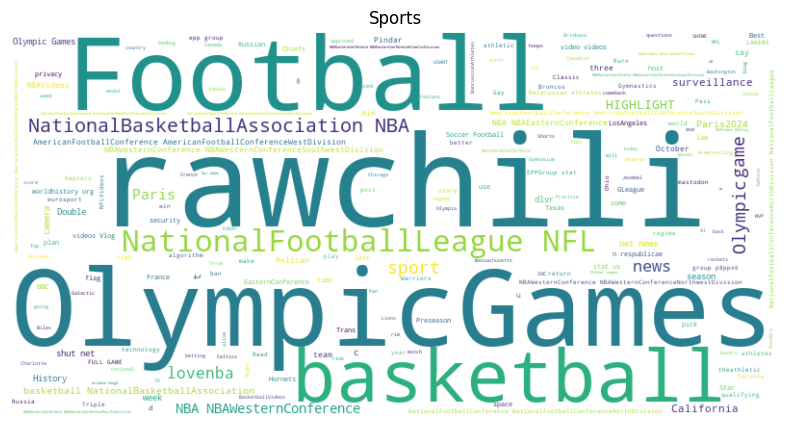

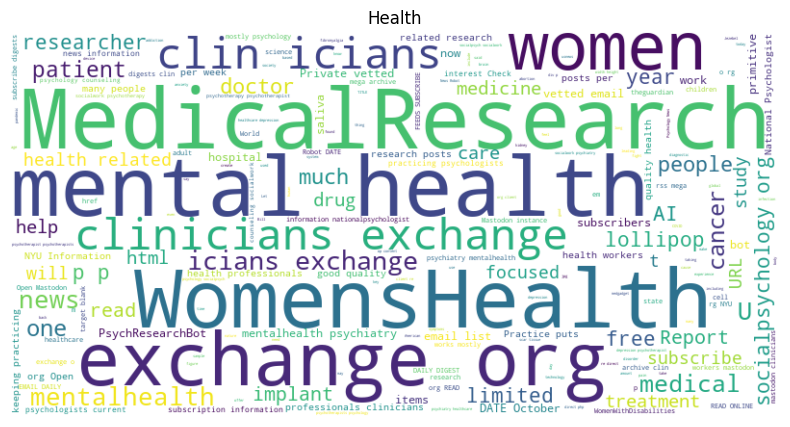

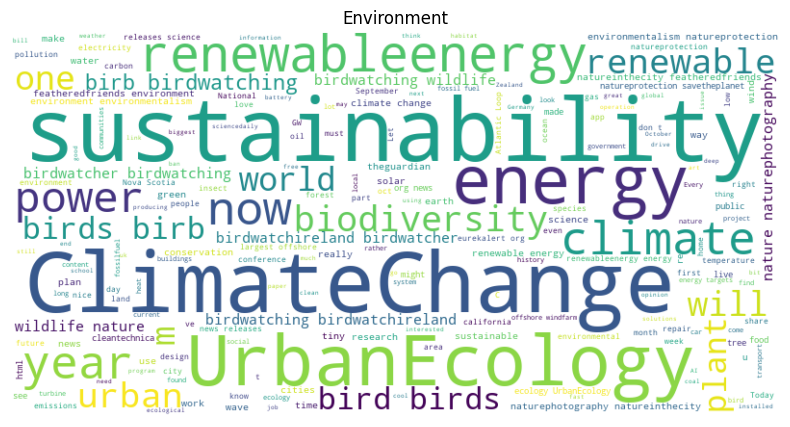

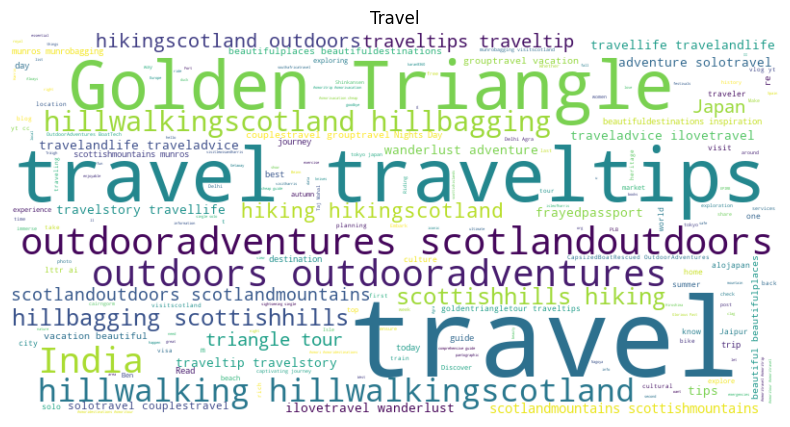

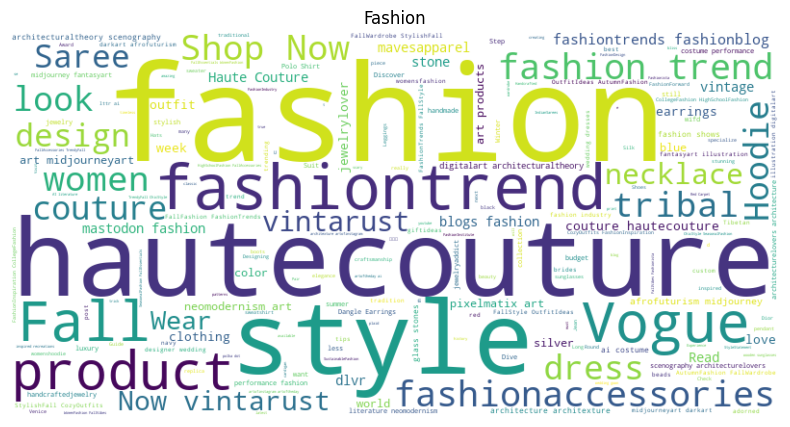

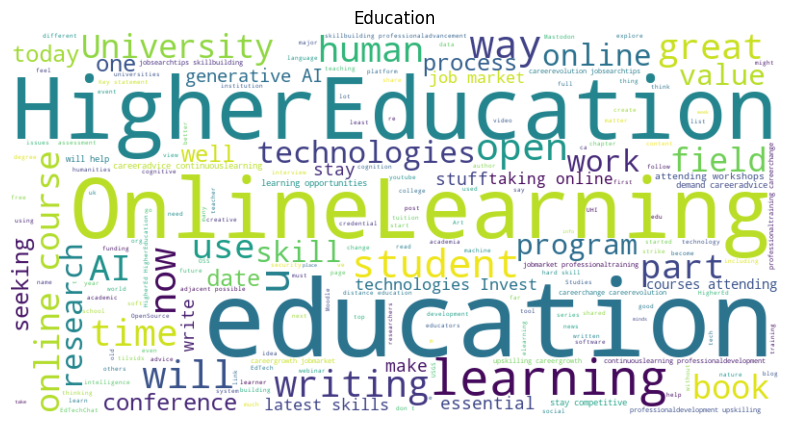

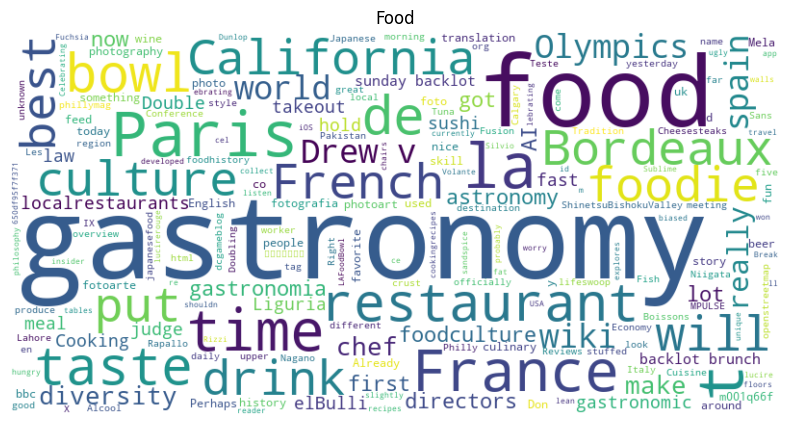

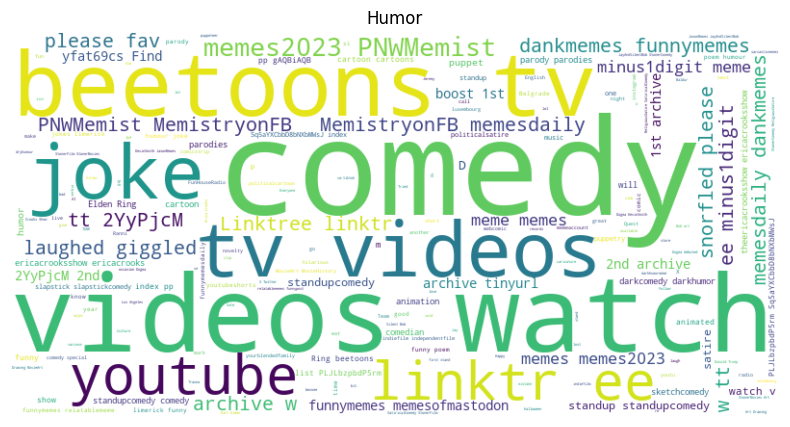

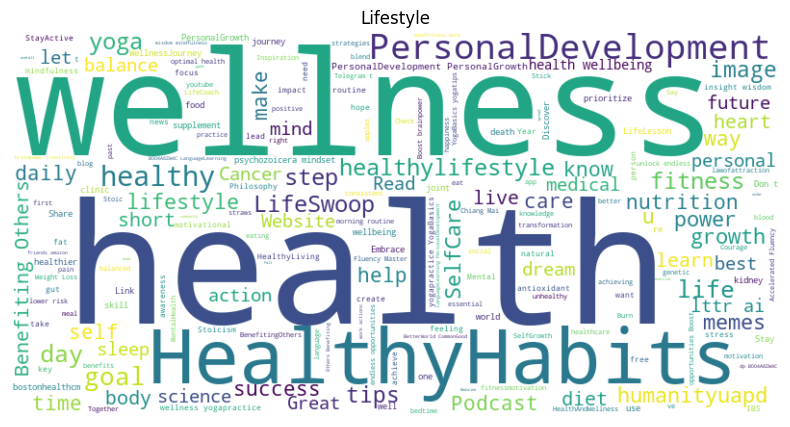

In [61]:
for topic in df['topic'].unique():

    politics_content = df[df['topic'] == topic]['content']

    politics_text = ' '.join(politics_content)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(politics_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(topic)
    plt.axis("off")
    plt.show()

In [45]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import norm

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 10000)
vectors = vectorizer.fit_transform(df['content'])
# print(vectors.shape)
# print(vectorizer.get_feature_names())


svd = TruncatedSVD(n_components=20, n_iter=7, random_state=42)
# svd.fit(vectors)
U = svd.fit_transform(vectors)
# U_normalized = U / norm(U, axis=1, keepdims=True)

V = svd.components_
kmeansU = KMeans(n_clusters=20, random_state=0, max_iter=10).fit(U)
cluster_centers = kmeansU.cluster_centers_


/Users/yulin/anaconda3/envs/mon_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca',n_iter=1000, verbose=2)
tsne_mat = tsne.fit_transform(U)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1864 samples in 0.002s...
[t-SNE] Computed neighbors for 1864 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1864
[t-SNE] Computed conditional probabilities for sample 1864 / 1864
[t-SNE] Mean sigma: 0.032094
[t-SNE] Computed conditional probabilities in 0.025s
[t-SNE] Iteration 50: error = 72.6100006, gradient norm = 0.0295499 (50 iterations in 0.624s)
[t-SNE] Iteration 100: error = 70.3966217, gradient norm = 0.0025053 (50 iterations in 0.276s)
[t-SNE] Iteration 150: error = 70.2481079, gradient norm = 0.0014467 (50 iterations in 0.286s)
[t-SNE] Iteration 200: error = 70.2081757, gradient norm = 0.0008105 (50 iterations in 0.302s)
[t-SNE] Iteration 250: error = 70.1938782, gradient norm = 0.0005839 (50 iterations in 0.429s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.193878
[t-SNE] Iteration 300: error = 1.4417188, gradient norm = 0.0217842 (50 iterations in 0.295s)

In [47]:
label_numerique = df['topic'].astype('category').cat.codes
label_numerique.unique()

array([10, 13, 11,  2,  9,  0, 12,  6,  3, 14,  4,  1,  5,  7,  8],
      dtype=int8)

/var/folders/db/zvtvgxj96ljd7lnpj8t_c8l40000gn/T/ipykernel_7663/874311202.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_mat[indices, 0], tsne_mat[indices, 1], c=colors[i], label=f'{unique_labels[i]}', s=10)
/var/folders/db/zvtvgxj96ljd7lnpj8t_c8l40000gn/T/ipykernel_7663/874311202.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c=colors[i],

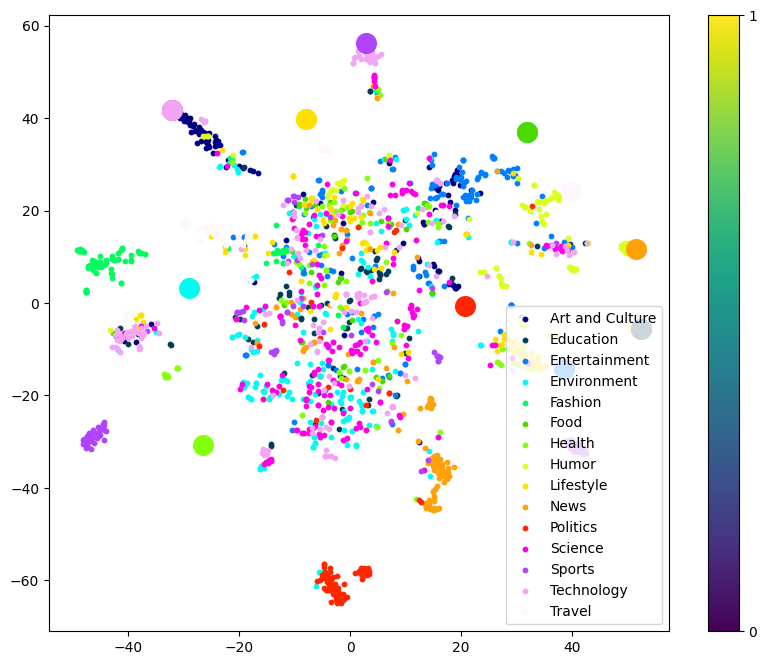

In [48]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming you have calculated tsne_mat, label_numerique, and NN2cluster
# Also, assuming you have access to the original category labels stored in df['topic']

# Get unique labels and corresponding colors
unique_labels = np.unique(df['topic'])
num_labels = len(unique_labels)
colors = cm.gist_ncar(np.linspace(0, 1, num_labels))  # You can use any colormap you prefer

# Get the cluster centers
cluster_centers = tsne_mat[NN2cluster]

plt.figure(figsize=(10, 8))

# Plot each point with corresponding label color and original text label
for i in range(num_labels):
    indices = np.where(df['topic'] == unique_labels[i])
    plt.scatter(tsne_mat[indices, 0], tsne_mat[indices, 1], c=colors[i], label=f'{unique_labels[i]}', s=10)

# Plot the center cluster points in black
for i in range(num_labels):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c=colors[i],s=200, marker='o')

plt.colorbar(ticks=range(num_labels))
plt.legend()
plt.show()
